In [1]:
import matplotlib.pyplot as plt

I want to compare whether it's better to pay an existing employee overtime or add an additional worker.

First I brainstorm a set of parameters I think will be relevant for this exercise.

The specific values may be incorrect for the specific situation, but the values can be adjusted later (separate from the process of developing the model).

In [2]:
hourly_wage=20
hours_in_normal_workday=8
number_of_widgets_per_trained_worker_per_hour=3
number_of_widgets_per_worker_per_hour_during_training=1
training_duration_in_days=5
duration_of_comparison_in_days=30

I'm going to do the trade-off analysis as a function of time. Therefore I need to choose a timescale that's relevant. 

For example, increments of "seconds" is probably too fine grain, while increments of "centuries" is too coarse grained. 

In [3]:
list_of_days=range(1,duration_of_comparison_in_days+1)

I need to store the results of the model to an array.

Elements of the array correspond to how each parameter is evolving over time.

In [4]:
cumulative_number_widgets_produced_by_trained_worker=0
number_widgets_produced_by_trained_worker=[]

cumulative_money_spent_on_trained_worker=0
money_spent_on_trained_worker=[]

cumulative_number_widgets_produced_by_new_worker=0
number_widgets_produced_by_new_worker=[]

cumulative_money_spent_on_new_worker=0
money_spent_on_new_worker=[]

In terms of both cost and productivity, my first step is to compare an existing trained worker to new worker over the span of multiple days. 

This isn't the analysis I want to end up with; it's an intermediate exploration of the model.

In [5]:
for this_day in list_of_days:
    # trained worker
    cumulative_money_spent_on_trained_worker+=hourly_wage*hours_in_normal_workday
    money_spent_on_trained_worker.append(cumulative_money_spent_on_trained_worker)

    cumulative_number_widgets_produced_by_trained_worker+=number_of_widgets_per_trained_worker_per_hour*hours_in_normal_workday
    number_widgets_produced_by_trained_worker.append(cumulative_number_widgets_produced_by_trained_worker)

    # new worker
    cumulative_money_spent_on_new_worker+=hourly_wage*hours_in_normal_workday
    money_spent_on_new_worker.append(cumulative_money_spent_on_new_worker)
    if (this_day<training_duration_in_days): # during training, productivity is lower
        cumulative_number_widgets_produced_by_new_worker+=number_of_widgets_per_worker_per_hour_during_training*hours_in_normal_workday
    else:
        cumulative_number_widgets_produced_by_new_worker+=number_of_widgets_per_trained_worker_per_hour*hours_in_normal_workday
    number_widgets_produced_by_new_worker.append(cumulative_number_widgets_produced_by_new_worker)

Visualize the results

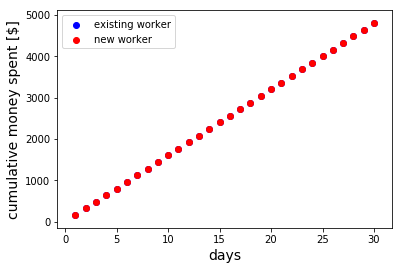

In [6]:
_=plt.scatter(list_of_days,money_spent_on_trained_worker,color='blue', label='existing worker')
_=plt.scatter(list_of_days,money_spent_on_new_worker,color='red', label='new worker')
_=plt.xlabel('days',fontsize=14)
_=plt.ylabel('cumulative money spent [$]',fontsize=14)
ax = plt.gca() # get current axis
_=ax.legend()

--> Cost of trained worker and new worker is same

Let's compare productivity

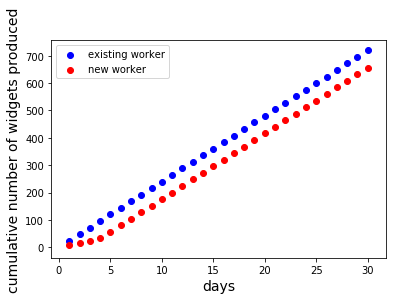

In [7]:
_=plt.scatter(list_of_days,number_widgets_produced_by_trained_worker,color='blue', label='existing worker')
_=plt.scatter(list_of_days,number_widgets_produced_by_new_worker,color='red', label='new worker')
_=plt.xlabel('days',fontsize=14)
_=plt.ylabel('cumulative number of widgets produced',fontsize=14)
ax = plt.gca()
_=ax.legend()

_Conclusion_: never hire anyone new -- the production rate is lower while the cost is same.

<BR>
<BR>
<BR>
<BR>
<BR>
We can make an even more powerful observation: meaure the time for new worker to reach parity with existing worker

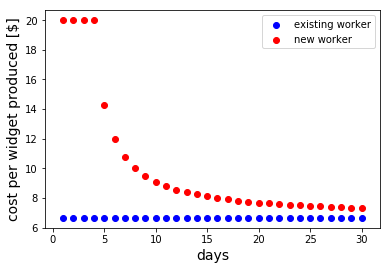

In [8]:
cost_per_widget_from_trained_worker = [x/y for x, y in zip(money_spent_on_trained_worker, 
                                                           number_widgets_produced_by_trained_worker)]
cost_per_widget_from_new_worker = [x/y for x, y in zip(money_spent_on_new_worker, 
                                                           number_widgets_produced_by_new_worker)]

_=plt.scatter(list_of_days,cost_per_widget_from_trained_worker,color='blue', label='existing worker')
_=plt.scatter(list_of_days,cost_per_widget_from_new_worker,color='red', label='new worker')
_=plt.xlabel('days',fontsize=14)
_=plt.ylabel('cost per widget produced [$]',fontsize=14)
ax = plt.gca()
_=ax.legend()

_Conclusion_: Hiring new staff is inefficient.

<BR>
<BR>
<BR>
<BR>
<BR>
What if we want to produce additional widgets in a fixed time window? 

Is it better to hire additional staff or pay existing workers overtime?

In [9]:
duration_of_comparison_in_days=30
max_overtime_in_hours_per_day=3
overtime_factor=1.25

In [10]:
cumulative_number_widgets_produced_by_trained_worker=0
number_widgets_produced_by_trained_worker=[]

cumulative_money_spent_on_trained_worker=0
money_spent_on_trained_worker=[]

cumulative_number_widgets_produced_by_new_worker=0
number_widgets_produced_by_new_worker=[]

cumulative_money_spent_on_new_worker=0
money_spent_on_new_worker=[]

In [11]:
for this_day in list_of_days:
    # pay existing worker overtime
    #   - costs more money due to overtime
    cumulative_money_spent_on_trained_worker+=(hourly_wage*hours_in_normal_workday +
                                               hourly_wage*overtime_factor*max_overtime_in_hours_per_day)
    money_spent_on_trained_worker.append(cumulative_money_spent_on_trained_worker)

    #   - number of widgets produced is higher too
    cumulative_number_widgets_produced_by_trained_worker+=number_of_widgets_per_trained_worker_per_hour*(hours_in_normal_workday+max_overtime_in_hours_per_day)
    number_widgets_produced_by_trained_worker.append(cumulative_number_widgets_produced_by_trained_worker)

    
    # pay existing worker normally AND hire a new worker
    cumulative_money_spent_on_new_worker+=hourly_wage*hours_in_normal_workday*2
    money_spent_on_new_worker.append(cumulative_money_spent_on_new_worker)
    if (this_day<training_duration_in_days):
        cumulative_number_widgets_produced_by_new_worker+=(number_of_widgets_per_worker_per_hour_during_training*hours_in_normal_workday+
                                                           number_of_widgets_per_trained_worker_per_hour*hours_in_normal_workday)
    else:
        cumulative_number_widgets_produced_by_new_worker+=number_of_widgets_per_trained_worker_per_hour*hours_in_normal_workday*2
    number_widgets_produced_by_new_worker.append(cumulative_number_widgets_produced_by_new_worker)

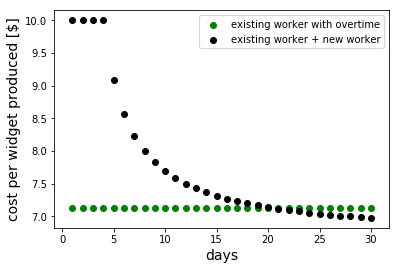

In [12]:
cost_per_widget_from_trained_worker = [x/y for x, y in zip(money_spent_on_trained_worker, 
                                                           number_widgets_produced_by_trained_worker)]
cost_per_widget_from_new_worker = [x/y for x, y in zip(money_spent_on_new_worker, 
                                                           number_widgets_produced_by_new_worker)]

_=plt.scatter(list_of_days,cost_per_widget_from_trained_worker,color='green', label='existing worker with overtime')
_=plt.scatter(list_of_days,cost_per_widget_from_new_worker,color='black', label='existing worker + new worker')
_=plt.xlabel('days',fontsize=14)
_=plt.ylabel('cost per widget produced [$]',fontsize=14)
ax = plt.gca() # get current axis
_=ax.legend()

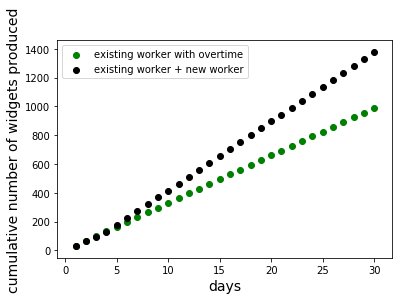

In [13]:
_=plt.scatter(list_of_days,number_widgets_produced_by_trained_worker,color='green', label='existing worker with overtime')
_=plt.scatter(list_of_days,number_widgets_produced_by_new_worker,color='black', label='existing worker + new worker')
_=plt.xlabel('days',fontsize=14)
_=plt.ylabel('cumulative number of widgets produced',fontsize=14)
ax = plt.gca() # get current axis
_=ax.legend()

One person cannot keep up with two over a long span of time

Zoom in on the first week:

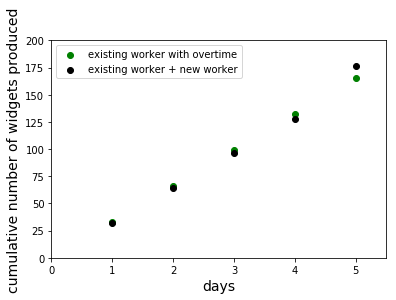

In [14]:
_=plt.scatter(list_of_days,number_widgets_produced_by_trained_worker,color='green', label='existing worker with overtime')
_=plt.scatter(list_of_days,number_widgets_produced_by_new_worker,color='black', label='existing worker + new worker')
_=plt.xlabel('days',fontsize=14)
_=plt.ylabel('cumulative number of widgets produced',fontsize=14)
ax = plt.gca() # get current axis
_=ax.legend()
_=plt.xlim(0, 5.5)
_=plt.ylim(0, 200)